In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_task1 = pd.read_excel('/Users/ameen/Downloads/202303_Task1_Sessions.xlsx')

In [ ]:
df_task1.head()

,"ymd,session_id,tracking_id,platform,is_app,is_repeater,traffic_type,country_name,agent_id,clickouts,bookings,session_duration,entry_page,total_ctp,arrival_day,departure_day"
0,"20220626,2022062620046057322,FA6JXA8TAJ,UK,0,1..."
1,"20220518,2022051821943006017,0X7RLU6KF7,BR,0,0..."
2,"20220508,2022050821020053928,0I59VWLQW0,UK,0,0..."
3,"20220507,2022050706015039122,JXNHOBQL50,CH,0,0..."
4,"20220523,2022052320052048087,W24I0V5Z2L,IT,0,0..."


In [ ]:
columns = df_task1.columns[0]

### Data Cleaning Task 1

In [ ]:
split_data = df_task1[columns].str.split(',', expand=True)

In [ ]:
split_data.columns = ['ymd', 'session_id', 'tracking_id', 'platform', 'is_app', 'is_repeater', 'traffic_type', 'country_name', 'agent_id', 'clickouts', 'bookings', 'session_duration', 'entry_page', 'total_ctp', 'arrival_day', 'departure_day']

In [ ]:
df_task1 = split_data.copy()

In [ ]:
# df_task1[df_task1['arrival_day']=='\\N']

In [ ]:
df_task1['date'] = df_task1['ymd'].str[0:4]+'-'+df_task1['ymd'].str[4:6]+'-'+df_task1['ymd'].str[6:8]

Observed some country name are repeated with a different name which might cause arriving at wrong statistical conclusions. Examples are:
<li>'Russian Federation' and 'Russia'</li>
<li>'Moldova' and 'Republic of Moldova'</li>
<li>'Lao People's Democratic Republic' and 'Laos'</li>
<li>'Ivory Coast' and 'Cote D'Ivoire'</li>
<li>'Korea' and 'Republic of Korea'</li>

In [ ]:
df_task1['country_name'] = df_task1['country_name'].replace({
                                                            'Republic of Korea':'Korea',
                                                             'Russian Federation':'Russia',
                                                             'Republic of Moldova':'Moldova',
                                                             "Lao People's Democratic Republic":'Laos',
                                                              "Cote D'Ivoire":'Ivory Coast'
                                                            })

In [ ]:
df_task1['is_repeater'] = df_task1['is_repeater'].astype(int)
df_task1['bookings'] = df_task1['bookings'].astype(int)
df_task1['session_duration'] = df_task1['session_duration'].astype(int)
df_task1['total_ctp'] = df_task1['total_ctp'].astype(int)
df_task1['clickouts'] = df_task1['clickouts'].astype(int)

In [ ]:
# Convert the 'Date' column to datetime
df_task1['date'] = pd.to_datetime(df_task1['date'])
df_task1['Weekday Name'] = df_task1['date'].dt.strftime('%A')
df_task1['is_weekend'] = np.where(df_task1['Weekday Name'].isin(['Sunday','Saturday']),1,0)

#### Aggregating Data at Date Level

In [ ]:
df_agg1 = df_task1.groupby(['date','Weekday Name']).agg({'session_id':'nunique','tracking_id':'nunique','is_repeater':'sum','clickouts':'sum','bookings':'sum','session_duration':'mean','total_ctp':'sum'}).reset_index()

In [ ]:
df_agg1.rename({'session_id':'total_sessions','tracking_id':'users','is_repeater':'repeat_user_sessions','session_duration':'average_session_duration'},inplace=True,axis=1)

## Task1 - Descriptive Analysis


### Summary of the Descriptive Analysis
* In June, there was a 6.6% decrease in total sessions and a 7.2% decrease in total bookings compared to May. However, during the same period, the Clickout Ratio (COR) increased from 0.82 to 0.87, and there was no significant drop in the total Click-Through Percentage (CTP).

* With regards to total sessions, most major countries experienced a decline, except for Turkey and Italy.

* Traffic types 8 and 10 notably reported a substantial drop in sessions, while the top two traffic types showed a slight increase in total sessions.

* Similarly, in the case of total bookings, most major countries, with the exception of Italy, Turkey, and Japan, reported a decrease. Traffic types 2 and 4 also observed a decline in bookings.

* The decline in bookings can be attributed to the drop in total sessions, indicating a strong correlation between the two.

* Overall, in terms of traffic health metrics, such as COR, CTP, and session duration, Trivago demonstrated better performance in June compared to May.

#### Please find the detailed analysis, codes and plots in the blocks below

###   Plotting Total Sessions, Users, and Clickouts over time

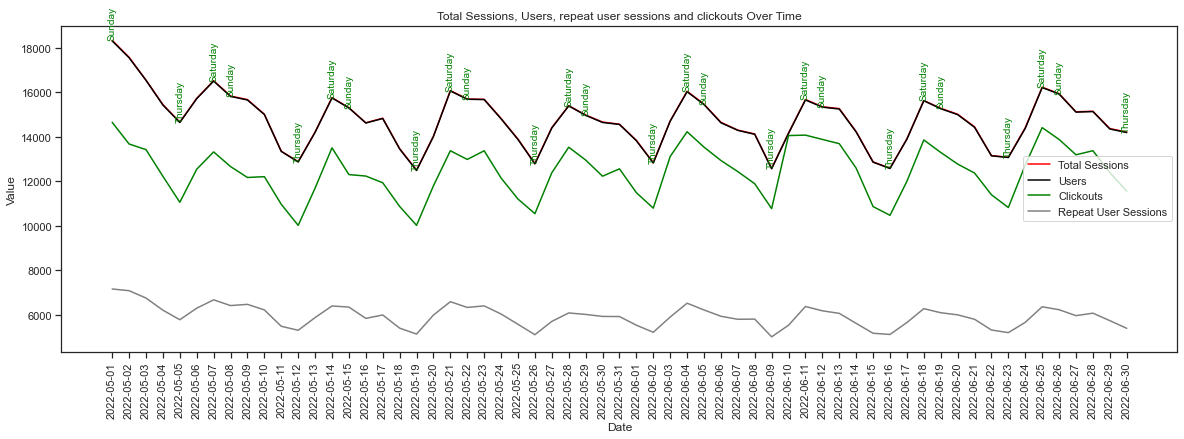

In [ ]:
sns.set(style="whitegrid")
sns.set_style("ticks")
# Create the line plot for 'total_sessions' and 'users'.
plt.figure(figsize=(20, 6))
ax = sns.lineplot(data=df_agg1, x='date', y='total_sessions', label='Total Sessions', color='red')
sns.lineplot(data=df_agg1, x='date', y='users', label='Users', color = 'black')
sns.lineplot(data=df_agg1, x='date', y='clickouts', label='Clickouts', color = 'green')
sns.lineplot(data=df_agg1, x='date', y='repeat_user_sessions', label='Repeat User Sessions', color = 'grey')

plt.title('Total Sessions, Users, repeat user sessions and clickouts Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Value')

# Set the x-axis tick positions and labels for all dates.
x_ticks = range(len(df_agg1))
x_labels = df_agg1['date']  # Format the date labels as desired.

ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, rotation=90)
for i, day in enumerate(df_agg1['Weekday Name']):
    if day in ('Sunday','Saturday','Thursday') :
        plt.text(i, df_agg1['total_sessions'].iloc[i], day, va='bottom', ha='center', rotation=90, fontsize=10, color='green')

# Add a legend for the lines.
plt.legend(loc='best')

plt.show()


# Add a legend for the lines.
# plt.legend(loc='best')

# plt.show()


The data presented here reveals a consistent trend in visitor counts, total sessions, Clickouts, and repeat user-initiated sessions when comparing May'22 to June'22. The graph exhibits a unique zigzag pattern, suggesting that there are weekly peaks in user visits followed by declines. Specifically, Saturdays experience the highest traffic, while Thursdays see the lowest traffic levels in a typical week.

### Plotting bookings over time

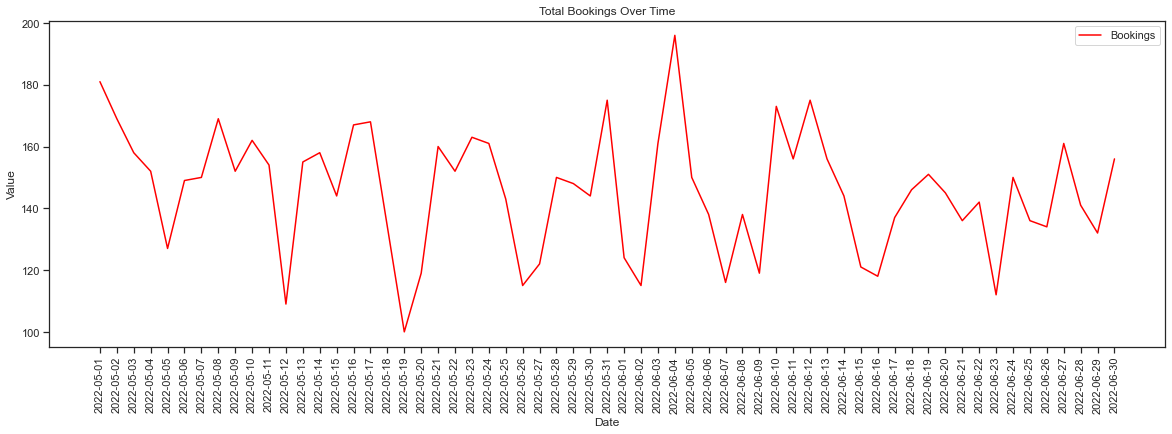

In [ ]:
sns.set(style="whitegrid")
sns.set_style("ticks")
plt.figure(figsize=(20, 6))
ax = sns.lineplot(data=df_agg1, x='date', y='bookings', label='Bookings', color='red')
# sns.lineplot(data=df_agg1, x='date', y='users', label='Users', color = 'black')

plt.title('Total Bookings Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Value')

# Set the x-axis tick positions and labels for all dates.
x_ticks = range(len(df_agg1))
x_labels = df_agg1['date']  # Format the date labels as desired.

ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, rotation=90)
# Add a legend for the lines.
plt.legend(loc='best')

plt.show()


The line plot above suggests that the total number of bookings has been on a steady trend from May'22 to June'22.

In [ ]:
## defining the Clickouts Ratio (COR)

In [ ]:
df_agg1['cor'] = df_agg1['clickouts']/df_agg1['total_sessions']

### Plotting COR

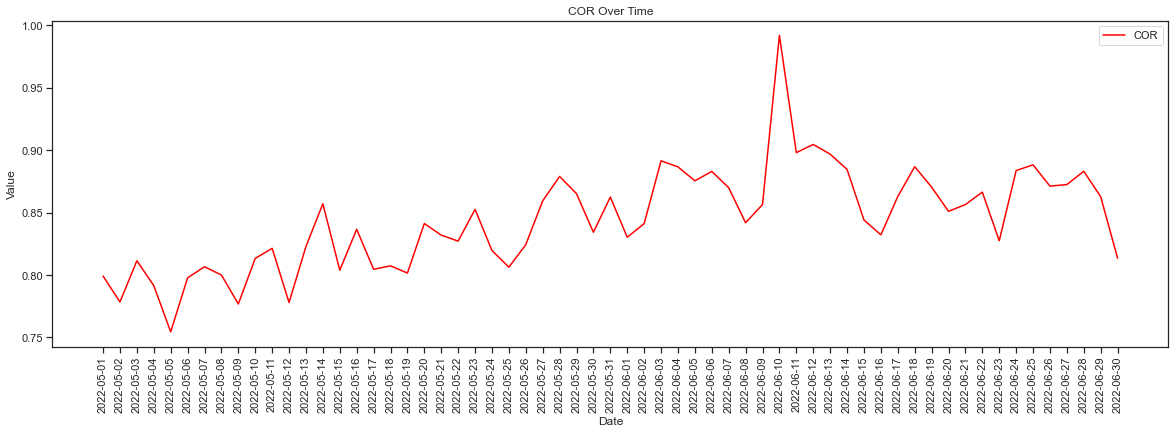

In [ ]:
sns.set(style="whitegrid")
sns.set_style("ticks")
# Create the line plot for COR
plt.figure(figsize=(20, 6))
ax = sns.lineplot(data=df_agg1, x='date', y='cor', label='COR', color='red')

plt.title('COR Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Value')

# Set the x-axis tick positions and labels for all dates.
x_ticks = range(len(df_agg1))
x_labels = df_agg1['date']  # Format the date labels as desired.

ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, rotation=90)

# Add a legend for the lines.
plt.legend(loc='best')

plt.show()

The line plot above suggests that the COR has seen a slightly increasing trend from May'22 to June'22.

### Plotting Average Session Duration over time

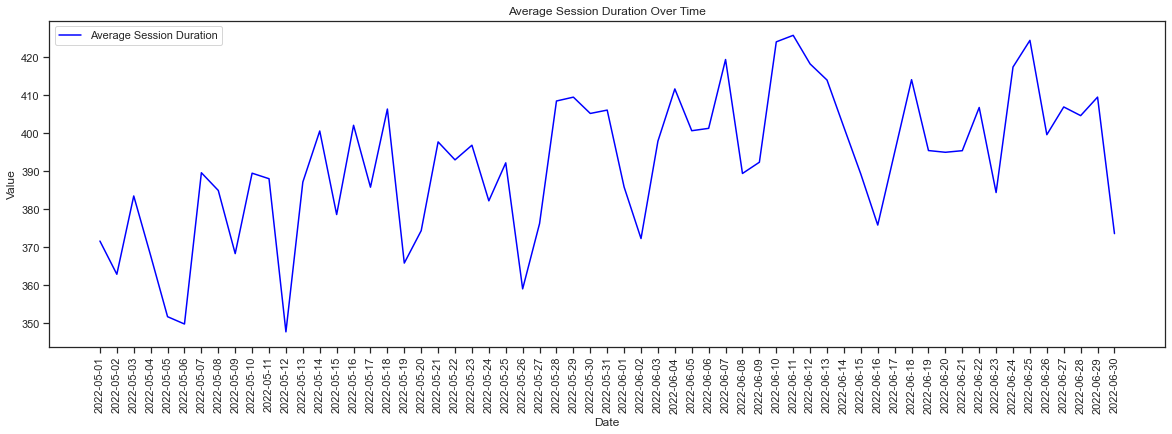

In [ ]:
sns.set(style="whitegrid")
sns.set_style("ticks")
# Create the line plot for Average Session Duration
plt.figure(figsize=(20, 6))
ax = sns.lineplot(data=df_agg1, x='date', y='average_session_duration', label='Average Session Duration', color='blue')

plt.title('Average Session Duration Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Value')

# Set the x-axis tick positions and labels for all dates.
x_ticks = range(len(df_agg1))
x_labels = df_agg1['date']  # Format the date labels as desired.

ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, rotation=90)

# Add a legend for the lines.
plt.legend(loc='best')

plt.show()

The average session duration has seen an slightly increasing trend from May 2022 to June 2022.

### Plotting Total Ctp over time

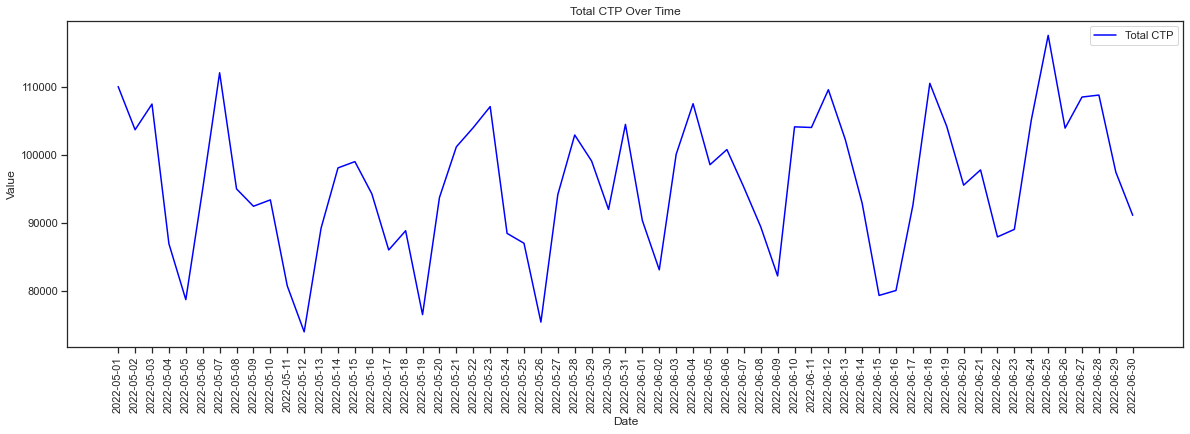

In [ ]:
sns.set(style="whitegrid")
sns.set_style("ticks")
# Create the line plot for Total Ctp.
plt.figure(figsize=(20, 6))
ax = sns.lineplot(data=df_agg1, x='date', y='total_ctp', label='Total CTP', color='blue')

plt.title('Total CTP Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Value')

# Set the x-axis tick positions and labels for all dates.
x_ticks = range(len(df_agg1))
x_labels = df_agg1['date']  # Format the date labels as desired.

ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, rotation=90)

# Add a legend for the lines.
plt.legend(loc='best')

plt.show()

The Total CTP also has seen a steady trend from May 2022 to June 2022.

#### Aggregating Data at Date X Country level

In [ ]:
df_agg2 = df_task1.groupby(['date','country_name']).agg({'session_id':'nunique','tracking_id':'nunique','is_repeater':'sum','clickouts':'sum','bookings':'sum','session_duration':'mean','total_ctp':'sum'}).reset_index()

In [ ]:
df_agg2.rename({'country_name':'country','session_id':'total_sessions','tracking_id':'users','is_repeater':'repeat_user_sessions','session_duration':'average_session_duration'},axis=1,inplace = True)

In [ ]:
df_agg2['date'] = pd.to_datetime(df_agg2['date'])
df_agg2['month'] = df_agg2['date'].dt.strftime('%B')

In [ ]:
df_temp = df_agg2.groupby('country')['total_sessions'].sum().reset_index()

In [ ]:
df_temp.sort_values('total_sessions',ascending = False, inplace=True)

In [ ]:
## 58% of the total sessions are originated from 10 countries
df_temp.sort_values('total_sessions',ascending = False).head(10).total_sessions.sum()/df_temp.total_sessions.sum()

0.5779577777777778

In [ ]:
top_10_countries = list(df_temp.head(10)['country'].unique())

In [ ]:
#changing the country names of countries which are not in top 10 countries list basis total sessions
df_agg2['country_tag'] = np.where(df_agg2['country'].isin(top_10_countries),df_agg2['country'],'others')

In [ ]:
df_agg3 = df_agg2.groupby(['month','country_tag']).agg({'total_sessions':'sum','users':'sum','repeat_user_sessions':'sum','clickouts':'sum','bookings':'sum','total_ctp':'sum'}).reset_index()

In [ ]:
top_10_countries

['United States',
 'India',
 'United Kingdom',
 'Brazil',
 'Turkey',
 'Japan',
 'Germany',
 'Italy',
 'Spain',
 'Mexico']

### Total Sessions Comparison for May and June by Country

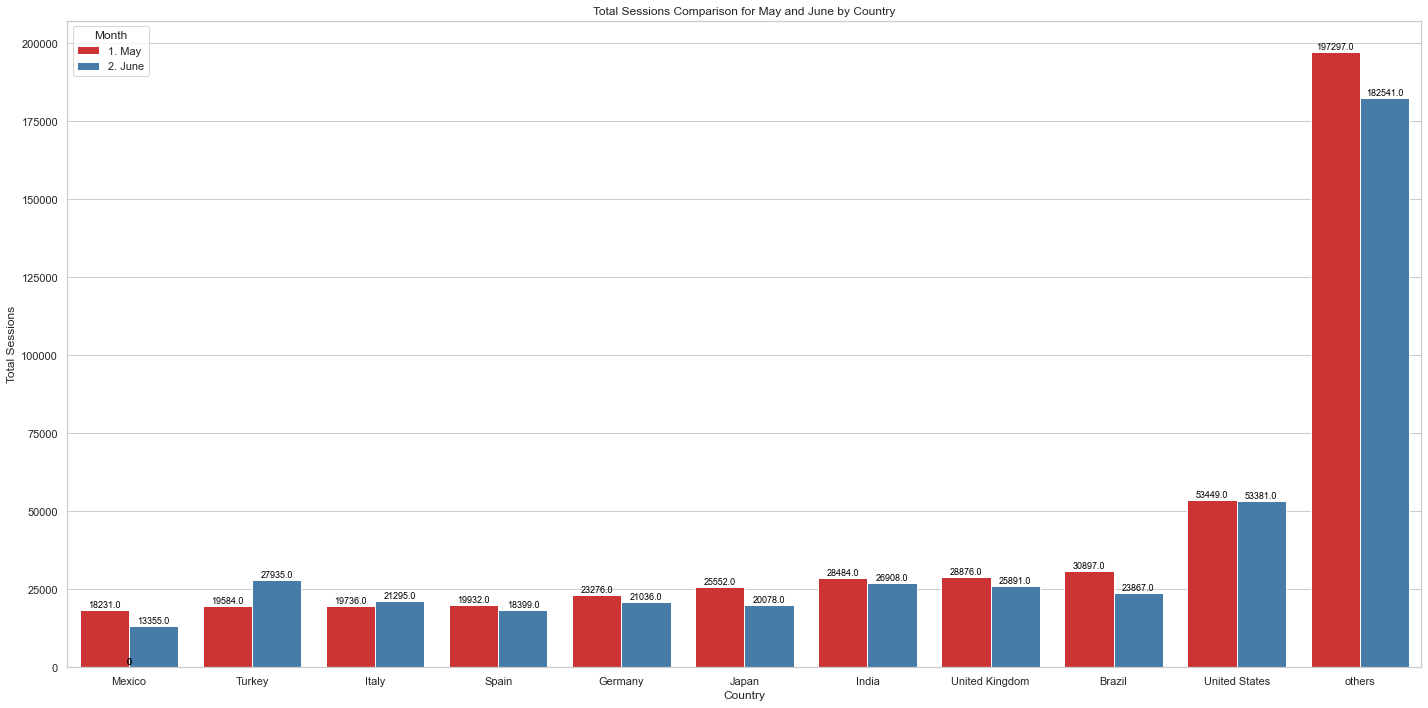

In [ ]:
# Set the style of the plot (optional but can improve aesthetics)
sns.set(style="whitegrid")

# Create a bar chart comparing May and June data for every country
df_agg3['month'] = df_agg3['month'].replace({'May': '1. May', 'June': '2. June'})
df_agg3.sort_values(['month','total_sessions'],inplace=True)
plt.figure(figsize=(20, 10))
ax = sns.barplot(x='country_tag', y='total_sessions', hue='month', data=df_agg3, palette='Set1')

# Set the title and labels
plt.title('Total Sessions Comparison for May and June by Country')
ax.set_xlabel('Country')
ax.set_ylabel('Total Sessions')

# Customize the legend and change the order of the legend labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, title='Month', loc='best')

# Annotate each bar with its corresponding y-value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

In [ ]:
## Creating a table to compare the May and June data
may_total_sessions = df_agg3[df_agg3['month'] == '1. May'].groupby('country_tag')['total_sessions'].sum().reset_index()
may_total_sessions.rename({'total_sessions':'May total sessions'},inplace=True, axis = 1)
june_total_sessions = df_agg3[df_agg3['month'] == '2. June'].groupby('country_tag')['total_sessions'].sum().reset_index()
june_total_sessions.rename({'total_sessions':'June total sessions'},inplace=True, axis = 1)
df_change = pd.merge(may_total_sessions,june_total_sessions, on ='country_tag', how='inner')
df_change['Perc. Change in Sessions'] = (df_change['June total sessions'] - df_change['May total sessions'])*100/df_change['May total sessions']
# df_change.sort_values('May total sessions',ascending = False).reset_index(drop=True)
# Calculate the overall total for May and June sessions and percentage change
overall_total_may = df_change['May total sessions'].sum()
overall_total_june = df_change['June total sessions'].sum()
overall_percentage_change = ((overall_total_june - overall_total_may) / overall_total_may) * 100

# Add a new row to the DataFrame
df_change.loc['Total'] = ['Overall', overall_total_may, overall_total_june, overall_percentage_change]

# Format the 'Perc. Change in Sessions' column with a percentage symbol and rounding
df_change['Perc. Change in Sessions'] = df_change['Perc. Change in Sessions'].apply(lambda x: f'{x:.1f}%')
df_change.sort_values('May total sessions',ascending = False,inplace=True)

# Reset the index to have a proper DataFrame
df_change = df_change.reset_index(drop=True)
df_change

,country_tag,May total sessions,June total sessions,Perc. Change in Sessions
0,Overall,465314,434686,-6.6%
1,others,197297,182541,-7.5%
2,United States,53449,53381,-0.1%
3,Brazil,30897,23867,-22.8%
4,United Kingdom,28876,25891,-10.3%
5,India,28484,26908,-5.5%
6,Japan,25552,20078,-21.4%
7,Germany,23276,21036,-9.6%
8,Spain,19932,18399,-7.7%
9,Italy,19736,21295,7.9%


Total sessions worldwide experienced a 6.6% decline in June when compared to May

### COR Comparison for May and June by Country

In [ ]:
df_agg3['cor'] = df_agg3['clickouts']/df_agg3['total_sessions']
df_agg3['cor'] = df_agg3['cor'].round(2)

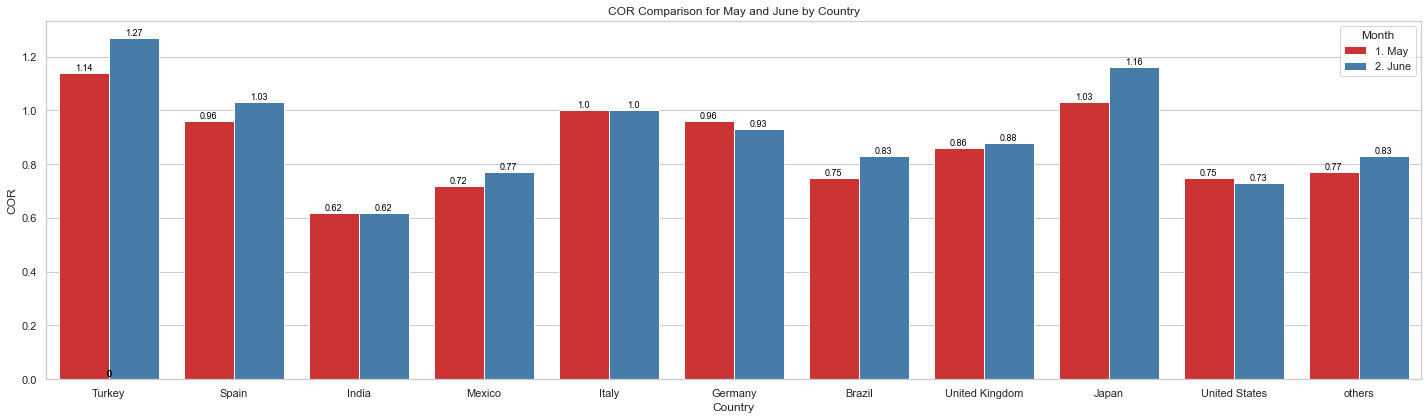

In [ ]:
sns.set(style="whitegrid")
df_agg3.sort_values(['month','bookings'],inplace=True)


# Create a bar chart comparing May and June data for every country
plt.figure(figsize=(20, 6))
ax = sns.barplot(x='country_tag', y='cor', hue='month', data=df_agg3, palette='Set1')

# Set the title and labels
plt.title('COR Comparison for May and June by Country')
ax.set_xlabel('Country')
ax.set_ylabel('COR')

# Customize the legend and change the order of the legend labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, title='Month', loc='best')

# Annotate each bar with its corresponding y-value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

In [ ]:
##Calculating the Overall COR change
may_cor = df_agg3[df_agg3['month']=='1. May']['clickouts'].sum()/df_agg3[df_agg3['month']=='1. May']['total_sessions'].sum()
june_cor = df_agg3[df_agg3['month']=='2. June']['clickouts'].sum()/df_agg3[df_agg3['month']=='2. June']['total_sessions'].sum()

In [ ]:
print("May Overall COR  : {}".format(round(may_cor,2)))
print("June Overall COR : {}".format(round(june_cor,2)))

May Overall COR  : 0.82
June Overall COR : 0.87


The Clickout Ratio (COR) has exhibited stability or growth in most of the top countries, excluding the United States and Germany, where it witnessed a slight decline in June compared to May. Overall COR increased from 0.82 in May to 0.87 in June

### Total Bookings Comparison for May and June by Country

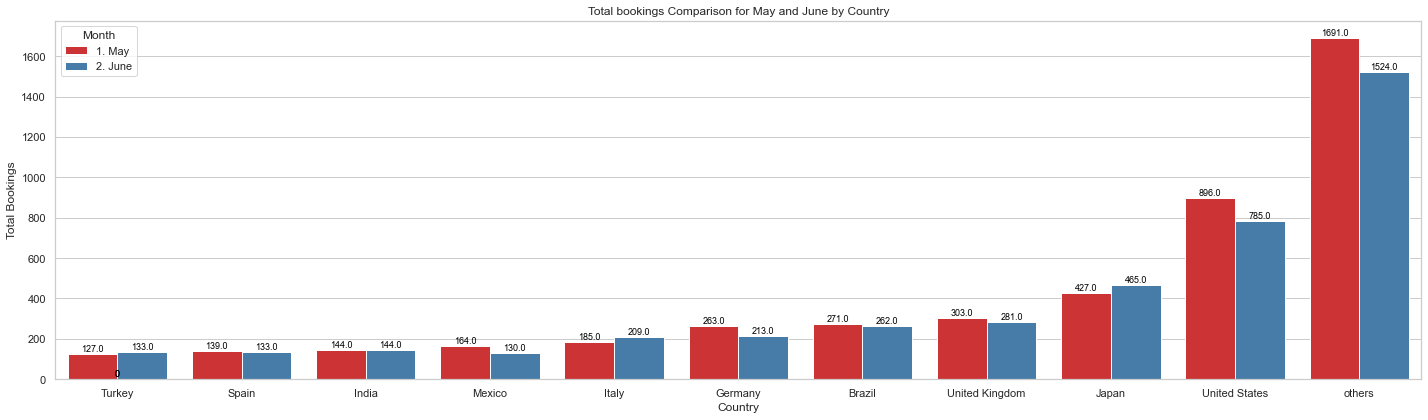

In [ ]:
# Set the style of the plot (optional but can improve aesthetics)
sns.set(style="whitegrid")
df_agg3.sort_values(['month','bookings'],inplace=True)


# Create a bar chart comparing May and June data for every country
plt.figure(figsize=(20, 6))
ax = sns.barplot(x='country_tag', y='bookings', hue='month', data=df_agg3, palette='Set1')

# Set the title and labels
plt.title('Total bookings Comparison for May and June by Country')
ax.set_xlabel('Country')
ax.set_ylabel('Total Bookings')

# Customize the legend and change the order of the legend labels
handles, labels = ax.get_legend_handles_labels()
# Change the order of the labels
ax.legend(handles=handles, labels=labels, title='Month', loc='best')

# Annotate each bar with its corresponding y-value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate May total bookings and rename the column
may_total_bookings = df_agg3[df_agg3['month'] == '1. May'].groupby('country_tag')['bookings'].sum().reset_index()
may_total_bookings.rename(columns={'bookings': 'May total bookings'}, inplace=True)

# Calculate June total bookings and rename the column
june_total_bookings = df_agg3[df_agg3['month'] == '2. June'].groupby('country_tag')['bookings'].sum().reset_index()
june_total_bookings.rename(columns={'bookings': 'June total bookings'}, inplace=True)

# Merge the DataFrames
df_change_bookings = pd.merge(may_total_bookings, june_total_bookings, on='country_tag', how='inner')

# Calculate the percentage change in bookings
df_change_bookings['Perc. Change in Bookings'] = (df_change_bookings['June total bookings'] - df_change_bookings['May total bookings']) * 100 / df_change_bookings['May total bookings']

# Calculate the overall total for May and June bookings and percentage change
overall_total_may_bookings = df_change_bookings['May total bookings'].sum()
overall_total_june_bookings = df_change_bookings['June total bookings'].sum()
overall_percentage_change_bookings = ((overall_total_june_bookings - overall_total_may_bookings) / overall_total_may_bookings) * 100

# Add a new row for overall bookings
df_change_bookings = df_change_bookings.append({'country_tag': 'Overall', 'May total bookings': overall_total_may_bookings, 'June total bookings': overall_total_june_bookings, 'Perc. Change in Bookings': overall_percentage_change_bookings}, ignore_index=True)

# Format the 'Perc. Change in Bookings' column with a percentage symbol and rounding
df_change_bookings['Perc. Change in Bookings'] = df_change_bookings['Perc. Change in Bookings'].apply(lambda x: f'{x:.1f}%')

# Sort the DataFrame by 'May total bookings' in descending order
df_change_bookings.sort_values('May total bookings', ascending=False, inplace=True)

# Reset the index for a proper DataFrame
df_change_bookings.reset_index(drop=True, inplace=True)

df_change_bookings

,country_tag,May total bookings,June total bookings,Perc. Change in Bookings
0,Overall,4610,4279,-7.2%
1,others,1691,1524,-9.9%
2,United States,896,785,-12.4%
3,Japan,427,465,8.9%
4,United Kingdom,303,281,-7.3%
5,Brazil,271,262,-3.3%
6,Germany,263,213,-19.0%
7,Italy,185,209,13.0%
8,Mexico,164,130,-20.7%
9,India,144,144,0.0%


While the COR saw a global increase, there was a 6.7% decline in total bookings from May to June.

### Total CTP Comparison for May and June by Country

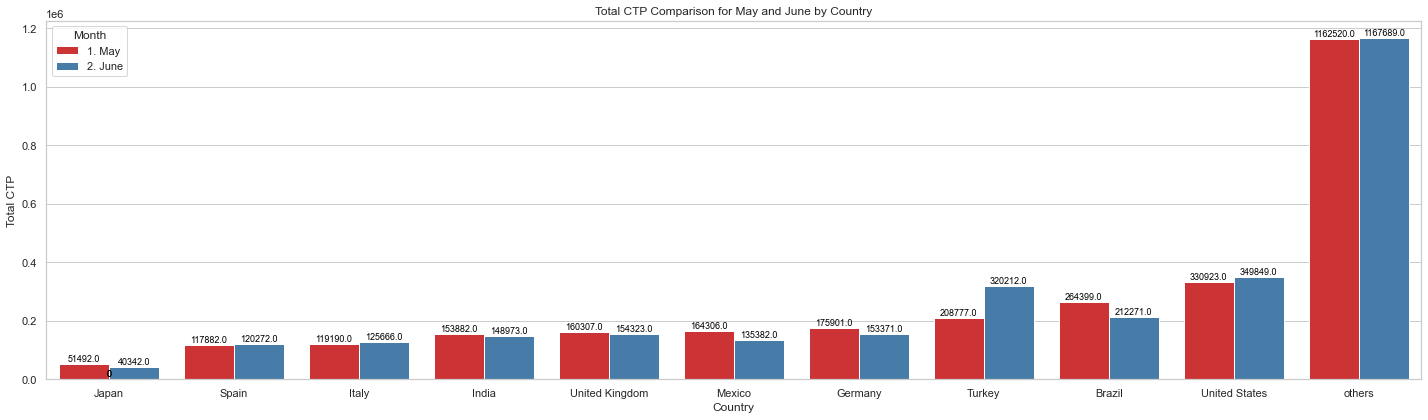

In [ ]:
# Set the style of the plot (optional but can improve aesthetics)
sns.set(style="whitegrid")
df_agg3.sort_values(['month','total_ctp'],inplace=True)


# Create a bar chart comparing May and June data for every country
plt.figure(figsize=(20, 6))
ax = sns.barplot(x='country_tag', y='total_ctp', hue='month', data=df_agg3, palette='Set1')

# Set the title and labels
plt.title('Total CTP Comparison for May and June by Country')
ax.set_xlabel('Country')
ax.set_ylabel('Total CTP')

# Customize the legend and change the order of the legend labels
handles, labels = ax.get_legend_handles_labels()
# Change the order of the labels
ax.legend(handles=handles, labels=labels, title='Month', loc='best')

# Annotate each bar with its corresponding y-value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate May total CTP and rename the column
may_total_ctp = df_agg3[df_agg3['month'] == '1. May'].groupby('country_tag')['total_ctp'].sum().reset_index()
may_total_ctp.rename(columns={'total_ctp': 'May total CTP'}, inplace=True)

# Calculate June total CTP and rename the column
june_total_ctp = df_agg3[df_agg3['month'] == '2. June'].groupby('country_tag')['total_ctp'].sum().reset_index()
june_total_ctp.rename(columns={'total_ctp': 'June total CTP'}, inplace=True)

# Merge the DataFrames
df_change_ctp = pd.merge(may_total_ctp, june_total_ctp, on='country_tag', how='inner')

# Calculate the percentage change in CTP
df_change_ctp['Perc. Change in CTP'] = (df_change_ctp['June total CTP'] - df_change_ctp['May total CTP']) * 100 / df_change_ctp['May total CTP']

# Calculate the overall total for May and June CTP and percentage change
overall_total_may_ctp = df_change_ctp['May total CTP'].sum()
overall_total_june_ctp = df_change_ctp['June total CTP'].sum()
overall_percentage_change_ctp = ((overall_total_june_ctp - overall_total_may_ctp) / overall_total_may_ctp) * 100

# Add a new row for overall CTP
df_change_ctp = df_change_ctp.append({'country_tag': 'Overall', 'May total CTP': overall_total_may_ctp, 'June total CTP': overall_total_june_ctp, 'Perc. Change in CTP': overall_percentage_change_ctp}, ignore_index=True)

# Format the 'Perc. Change in CTP' column with a percentage symbol and rounding
df_change_ctp['Perc. Change in CTP'] = df_change_ctp['Perc. Change in CTP'].apply(lambda x: f'{x:.1f}%')

# Sort the DataFrame by 'May total CTP' in descending order
df_change_ctp.sort_values('May total CTP', ascending=False, inplace=True)

# Reset the index for a proper DataFrame
df_change_ctp.reset_index(drop=True, inplace=True)

df_change_ctp

,country_tag,May total CTP,June total CTP,Perc. Change in CTP
0,Overall,2909579,2928350,0.6%
1,others,1162520,1167689,0.4%
2,United States,330923,349849,5.7%
3,Brazil,264399,212271,-19.7%
4,Turkey,208777,320212,53.4%
5,Germany,175901,153371,-12.8%
6,Mexico,164306,135382,-17.6%
7,United Kingdom,160307,154323,-3.7%
8,India,153882,148973,-3.2%
9,Italy,119190,125666,5.4%


The total content items(Total CTP) viewed has increased by a whooping 1.3% in June compared to May.

In [ ]:
df_agg2

,date,country,total_sessions,users,repeat_user_sessions,clickouts,bookings,average_session_duration,total_ctp,month,country_tag
0,2022-05-01,Aland Islands,1,1,0,1,0,515.000000,0,May,others
1,2022-05-01,Albania,2,2,1,0,0,15.000000,0,May,others
2,2022-05-01,Algeria,16,16,6,5,0,152.125000,130,May,others
3,2022-05-01,Andorra,2,2,0,0,0,3.000000,0,May,others
4,2022-05-01,Angola,1,1,1,0,0,53.000000,0,May,others
...,...,...,...,...,...,...,...,...,...,...,...
8434,2022-06-30,Venezuela,15,15,2,12,1,312.133333,3,June,others
8435,2022-06-30,Vietnam,82,82,14,29,0,140.768293,121,June,others
8436,2022-06-30,Zambia,1,1,0,0,0,176.000000,1,June,others
8437,2022-06-30,Zimbabwe,1,1,0,2,0,614.000000,43,June,others


In [ ]:
df_agg4 = df_agg2.groupby(['month','country']).agg({'total_sessions':'sum','users':'sum','repeat_user_sessions':'sum','clickouts':'sum','bookings':'sum','total_ctp':'sum'}).reset_index()

In [ ]:
# Calculate May total CTP and rename the column
may_total_ctp = df_agg4[df_agg4['month'] == 'May'].groupby('country')['total_ctp'].sum().reset_index()
may_total_ctp.rename(columns={'total_ctp': 'May total CTP'}, inplace=True)

# Calculate June total CTP and rename the column
june_total_ctp = df_agg4[df_agg4['month'] == 'June'].groupby('country')['total_ctp'].sum().reset_index()
june_total_ctp.rename(columns={'total_ctp': 'June total CTP'}, inplace=True)

# Merge the DataFrames
df_change_ctp = pd.merge(may_total_ctp, june_total_ctp, on='country', how='outer')
df_change_ctp['May total CTP'] = df_change_ctp['May total CTP'].fillna(0)
df_change_ctp['June total CTP'] = df_change_ctp['June total CTP'].fillna(0)
# Calculate the percentage change in CTP
df_change_ctp['Perc. Change in CTP'] = (df_change_ctp['June total CTP'] - df_change_ctp['May total CTP']) * 100 / df_change_ctp['May total CTP']

# Calculate the overall total for May and June CTP and percentage change
overall_total_may_ctp = df_change_ctp['May total CTP'].sum()
overall_total_june_ctp = df_change_ctp['June total CTP'].sum()
overall_percentage_change_ctp = ((overall_total_june_ctp - overall_total_may_ctp) / overall_total_may_ctp) * 100

# Add a new row for overall CTP
df_change_ctp = df_change_ctp.append({'country': 'Overall', 'May total CTP': overall_total_may_ctp, 'June total CTP': overall_total_june_ctp, 'Perc. Change in CTP': overall_percentage_change_ctp}, ignore_index=True)

# Format the 'Perc. Change in CTP' column with a percentage symbol and rounding
df_change_ctp['Perc. Change in CTP'] = df_change_ctp['Perc. Change in CTP'].apply(lambda x: f'{x:.1f}%')

# Sort the DataFrame by 'May total CTP' in descending order
df_change_ctp.sort_values('May total CTP', ascending=False, inplace=True)

# Reset the index for a proper DataFrame
df_change_ctp.reset_index(drop=True, inplace=True)

df_change_ctp.head(30)

,country,May total CTP,June total CTP,Perc. Change in CTP
0,Overall,2909579.0,2928350.0,0.6%
1,United States,330923.0,349849.0,5.7%
2,Brazil,264399.0,212271.0,-19.7%
3,Turkey,208777.0,320212.0,53.4%
4,Germany,175901.0,153371.0,-12.8%
5,Mexico,164306.0,135382.0,-17.6%
6,United Kingdom,160307.0,154323.0,-3.7%
7,India,153882.0,148973.0,-3.2%
8,Italy,119190.0,125666.0,5.4%
9,Spain,117882.0,120272.0,2.0%


### Aggregating data at Traffic type X Month level

In [ ]:
df_task1['date'] = pd.to_datetime(df_task1['date'])

In [ ]:
df_task1['month'] = df_task1['date'].dt.strftime('%B')

In [ ]:
df_traffic_agg = df_task1.groupby(['month','traffic_type']).agg({'session_id':'nunique','tracking_id':'nunique','is_repeater':'sum','clickouts':'sum','bookings':'sum','session_duration':'mean','total_ctp':'sum'}).reset_index()

In [ ]:
df_traffic_agg.rename({'session_id':'total_sessions','tracking_id':'users','is_repeater':'repeat_user_sessions','session_duration':'average_session_duration'},axis=1,inplace = True)

In [ ]:
df_traffic_agg

,month,traffic_type,total_sessions,users,repeat_user_sessions,clickouts,bookings,average_session_duration,total_ctp
0,June,10,2111,2108,965,1912,2,700.368546,15495
1,June,2,148087,147562,58317,184985,2766,610.570145,1472093
2,June,4,48737,48724,18320,40917,241,348.513245,350718
3,June,6,154482,153749,55860,107709,1158,321.374833,812671
4,June,8,81269,80627,40524,43420,112,199.516999,277373
5,May,10,7457,7452,2348,5901,3,350.328819,60183
6,May,2,143843,143275,56553,175283,2972,616.842530,1364742
7,May,4,51263,51244,18711,42433,313,350.586154,357073
8,May,6,144020,143407,51924,98279,1170,323.633995,736971
9,May,8,118731,117704,59217,58744,152,189.168920,390610


### Total Sessions Comparison for May and June by Traffic Type

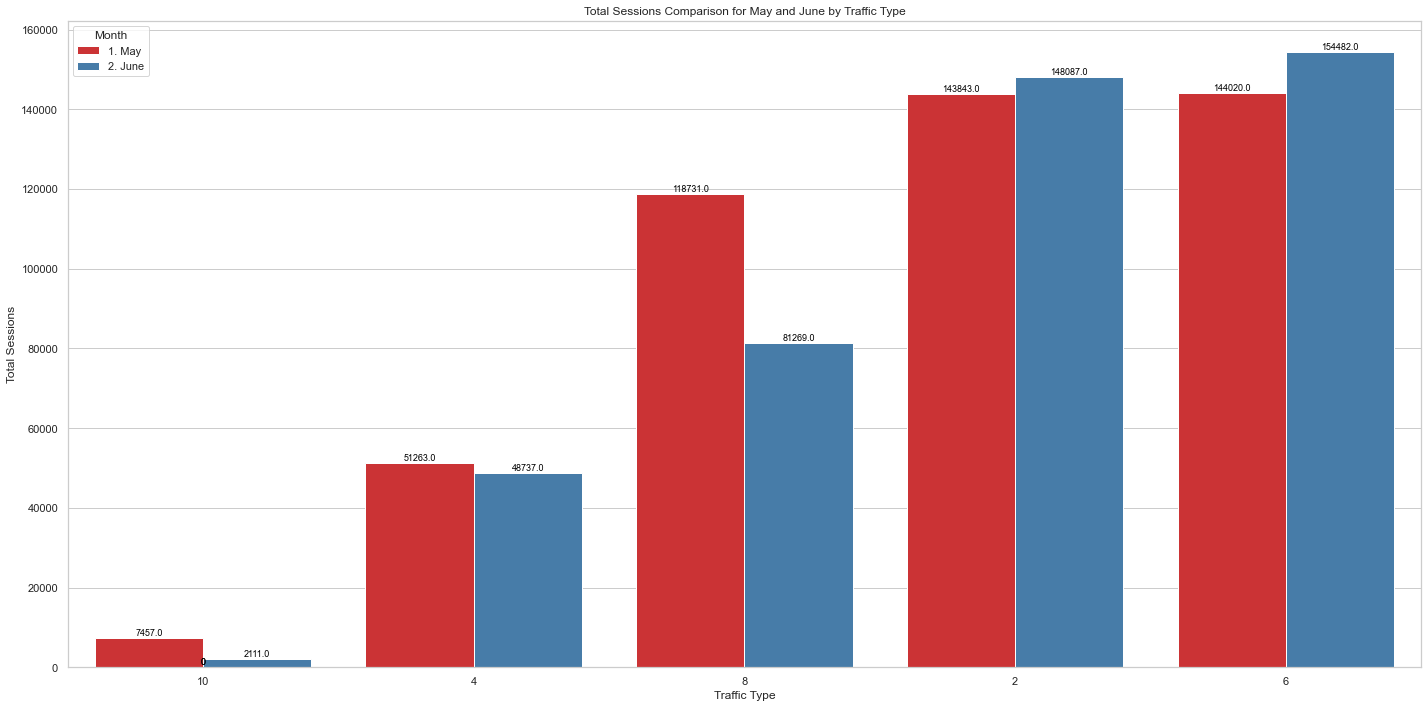

In [ ]:
# Set the style of the plot (optional but can improve aesthetics)
sns.set(style="whitegrid")

# Create a bar chart comparing May and June data for every traffic type
df_traffic_agg['month'] = df_traffic_agg['month'].replace({'May': '1. May', 'June': '2. June'})
df_traffic_agg.sort_values(['month','total_sessions'],inplace=True)
plt.figure(figsize=(20, 10))
ax = sns.barplot(x='traffic_type', y='total_sessions', hue='month', data=df_traffic_agg, palette='Set1')

# Set the title and labels
plt.title('Total Sessions Comparison for May and June by Traffic Type')
ax.set_xlabel('Traffic Type')
ax.set_ylabel('Total Sessions')

# Customize the legend and change the order of the legend labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, title='Month', loc='best')

# Annotate each bar with its corresponding y-value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

In [ ]:
## Creating a table to compare the May and June data
may_total_sessions = df_traffic_agg[df_traffic_agg['month'] == '1. May'].groupby('traffic_type')['total_sessions'].sum().reset_index()
may_total_sessions.rename({'total_sessions':'May total sessions'},inplace=True, axis = 1)
june_total_sessions = df_traffic_agg[df_traffic_agg['month'] == '2. June'].groupby('traffic_type')['total_sessions'].sum().reset_index()
june_total_sessions.rename({'total_sessions':'June total sessions'},inplace=True, axis = 1)
df_change = pd.merge(may_total_sessions,june_total_sessions, on ='traffic_type', how='inner')
df_change['Perc. Change in Sessions'] = (df_change['June total sessions'] - df_change['May total sessions'])*100/df_change['May total sessions']
# df_change.sort_values('May total sessions',ascending = False).reset_index(drop=True)
# Calculate the overall total for May and June sessions and percentage change
overall_total_may = df_change['May total sessions'].sum()
overall_total_june = df_change['June total sessions'].sum()
overall_percentage_change = ((overall_total_june - overall_total_may) / overall_total_may) * 100

# Add a new row to the DataFrame
df_change.loc['Total'] = ['Overall', overall_total_may, overall_total_june, overall_percentage_change]

# Format the 'Perc. Change in Sessions' column with a percentage symbol and rounding
df_change['Perc. Change in Sessions'] = df_change['Perc. Change in Sessions'].apply(lambda x: f'{x:.1f}%')
df_change.sort_values('May total sessions',ascending = False,inplace=True)

# Reset the index to have a proper DataFrame
df_change = df_change.reset_index(drop=True)
df_change

,traffic_type,May total sessions,June total sessions,Perc. Change in Sessions
0,Overall,465314,434686,-6.6%
1,6,144020,154482,7.3%
2,2,143843,148087,3.0%
3,8,118731,81269,-31.6%
4,4,51263,48737,-4.9%
5,10,7457,2111,-71.7%


### COR Comparison for May and June by Traffic Type

In [ ]:
df_traffic_agg['cor'] = df_traffic_agg['clickouts']/df_traffic_agg['total_sessions']
df_traffic_agg['cor'] = df_traffic_agg['cor'].round(2)

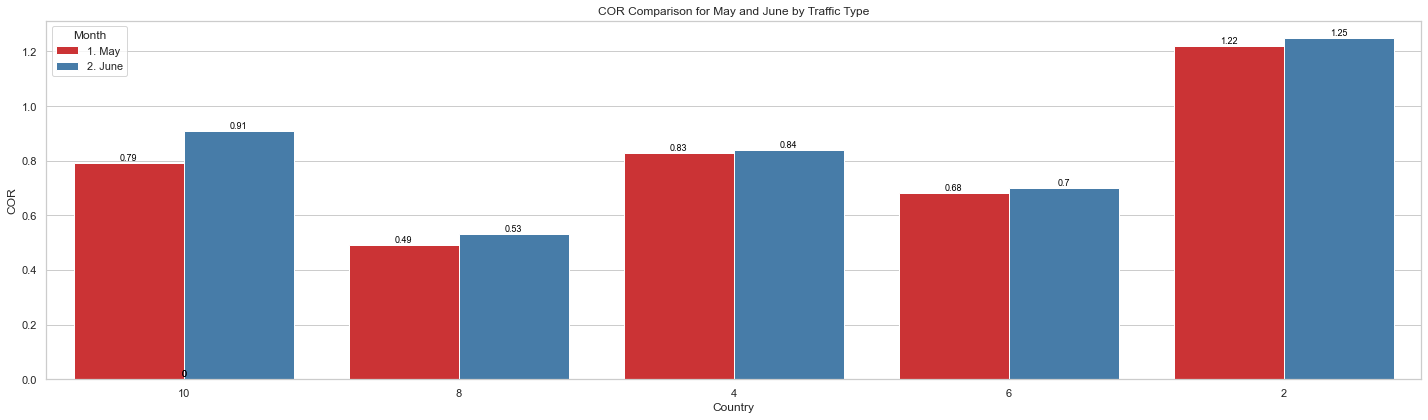

In [ ]:
sns.set(style="whitegrid")
df_traffic_agg.sort_values(['month','bookings'],inplace=True)


# Create a bar chart comparing May and June data for every country
plt.figure(figsize=(20, 6))
ax = sns.barplot(x='traffic_type', y='cor', hue='month', data=df_traffic_agg, palette='Set1')

# Set the title and labels
plt.title('COR Comparison for May and June by Traffic Type')
ax.set_xlabel('Country')
ax.set_ylabel('COR')

# Customize the legend and change the order of the legend labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, title='Month', loc='best')

# Annotate each bar with its corresponding y-value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

### Total Bookings Comparison for May and June by Traffic type

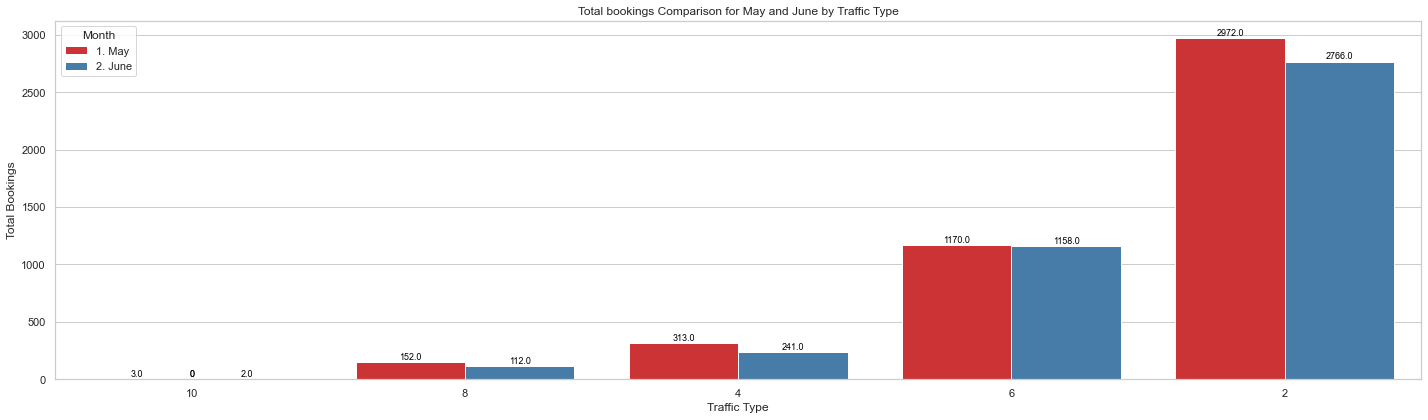

In [ ]:
# Set the style of the plot (optional but can improve aesthetics)
sns.set(style="whitegrid")
df_traffic_agg.sort_values(['month','bookings'],inplace=True)


# Create a bar chart comparing May and June data for every country
plt.figure(figsize=(20, 6))
ax = sns.barplot(x='traffic_type', y='bookings', hue='month', data=df_traffic_agg, palette='Set1')

# Set the title and labels
plt.title('Total bookings Comparison for May and June by Traffic Type')
ax.set_xlabel('Traffic Type')
ax.set_ylabel('Total Bookings')

# Customize the legend and change the order of the legend labels
handles, labels = ax.get_legend_handles_labels()
# Change the order of the labels
ax.legend(handles=handles, labels=labels, title='Month', loc='best')

# Annotate each bar with its corresponding y-value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

### Total CTP Comparison for May and June by Country

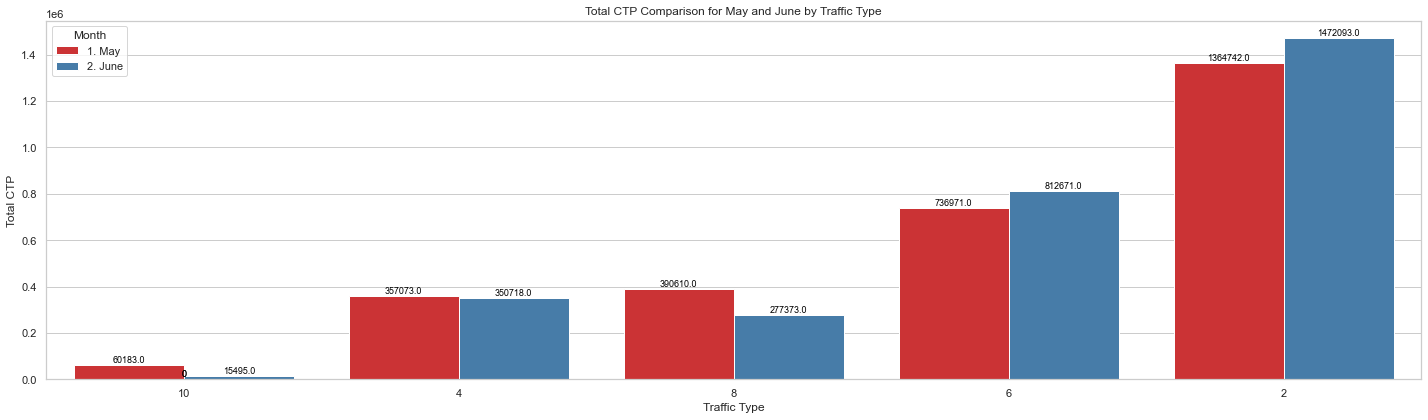

In [ ]:
# Set the style of the plot (optional but can improve aesthetics)
sns.set(style="whitegrid")
df_traffic_agg.sort_values(['month','total_ctp'],inplace=True)


# Create a bar chart comparing May and June data for every traffic type
plt.figure(figsize=(20, 6))
ax = sns.barplot(x='traffic_type', y='total_ctp', hue='month', data=df_traffic_agg, palette='Set1')

# Set the title and labels
plt.title('Total CTP Comparison for May and June by Traffic Type')
ax.set_xlabel('Traffic Type')
ax.set_ylabel('Total CTP')

# Customize the legend and change the order of the legend labels
handles, labels = ax.get_legend_handles_labels()
# Change the order of the labels
ax.legend(handles=handles, labels=labels, title='Month', loc='best')

# Annotate each bar with its corresponding y-value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

### Summary of the Descriptive Analysis
* In June, there was a 6.6% decrease in total sessions and a 7.2% decrease in total bookings compared to May. However, during the same period, the Clickout Ratio (COR) increased from 0.82 to 0.87, and there was no significant drop in the total Click-Through Percentage (CTP).

* With regards to total sessions, most major countries experienced a decline, except for Turkey and Italy.

* Traffic types 8 and 10 notably reported a substantial drop in sessions, while the top two traffic types showed a slight increase in total sessions.

* Similarly, in the case of total bookings, most major countries, with the exception of Italy, Turkey, and Japan, reported a decrease. Traffic types 2 and 4 also observed a decline in bookings.

* The decline in bookings can be attributed to the drop in total sessions, indicating a strong correlation between the two.

* Overall, in terms of traffic health metrics, such as COR, CTP, and session duration, Trivago demonstrated better performance in June compared to May.

## Task1 Q1)
Calculate the clickout ratio per platform and device type - what platform has the
highest COR? What device has the lowest COR? Are there differences by traffic
type? Can you draw any conclusions from the ratios about the coded values for traffic
type?

### COR Analysis with Platform

In [ ]:
df_platform_cor = df_task1.groupby(['platform']).agg({'session_id':'nunique','clickouts':'sum'}).reset_index()

In [ ]:
df_platform_cor.rename({'session_id':'sessions'},axis=1,inplace=True)

In [ ]:
df_platform_cor['cor'] = df_platform_cor['clickouts']/df_platform_cor['sessions']

In [ ]:
df_platform_cor.sort_values('cor',ascending = False).head()

,platform,sessions,clickouts,cor
48,TR,48254,59227,1.227401
35,NZ,5201,5890,1.132475
29,JP,45800,49963,1.090895
28,IT,41296,41494,1.004795
17,ES,39397,38613,0.980100


(55, 4)

/var/folders/zb/63y1717919g6xzzntmcglcvw0000gn/T/ipykernel_11913/999297877.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='platform', y='cor', data=df_platform_cor, palette='Set1')


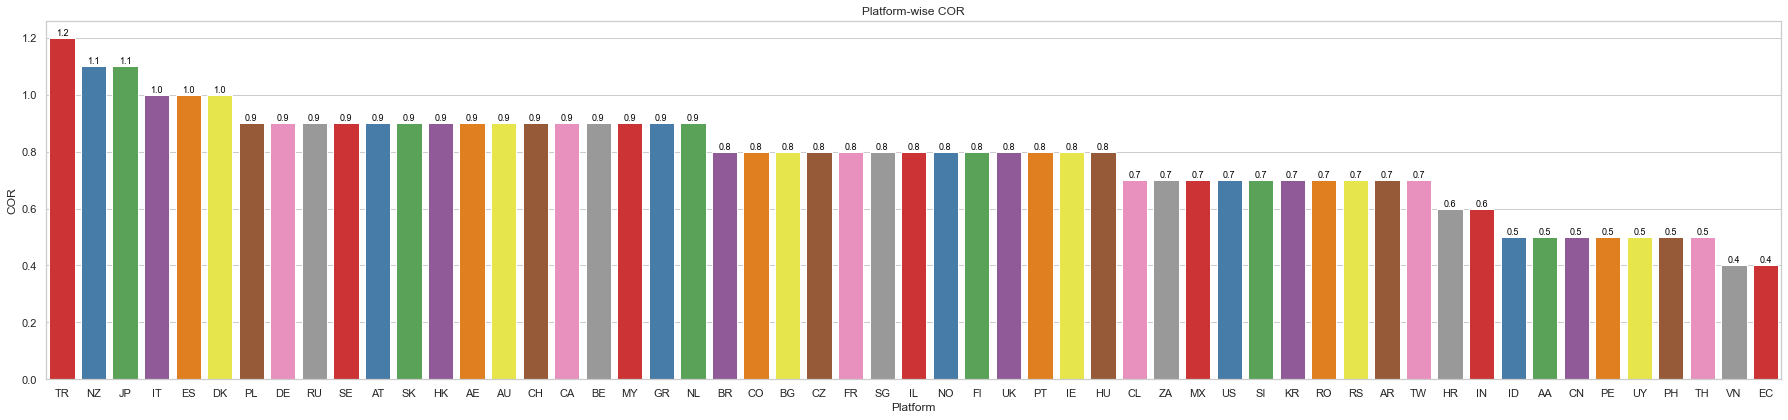

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot (optional but can improve aesthetics)
sns.set(style="whitegrid")
df_platform_cor.sort_values('cor',inplace=True,ascending = False)
df_platform_cor['cor'] = df_platform_cor['cor'].round(1)

# Create a bar chart comparing May and June data for every country
plt.figure(figsize=(25, 6))
ax = sns.barplot(x='platform', y='cor', data=df_platform_cor, palette='Set1')

# Set the title and labels
plt.title('Platform-wise COR')
ax.set_xlabel('Platform')
ax.set_ylabel('COR')

# Customize the legend and change the order of the legend labels
handles, labels = ax.get_legend_handles_labels()
# Change the order of the labels
# ax.legend(handles=handles, labels=labels, title='Month', loc='best')

# Annotate each bar with its corresponding y-value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

#### The platform with the highest COR is TR, with a combined COR of 1.22 for May and June 2022.

### COR Analysis with Device Type

In [ ]:
df_device_cor = df_task1.groupby(['agent_id']).agg({'session_id':'nunique','clickouts':'sum'}).reset_index()

In [ ]:
df_device_cor.rename({'session_id':'sessions'},axis=1,inplace=True)

In [ ]:
df_device_cor['cor'] = df_device_cor['clickouts']/df_device_cor['sessions']

In [ ]:
df_device_cor.sort_values('cor')

,agent_id,sessions,clickouts,cor
7,24,1773,991,0.558940
5,20,356658,256492,0.719154
3,18,173761,128059,0.736984
8,26,27127,22119,0.815387
2,16,59273,48609,0.820087
6,22,3257,2983,0.915874
0,12,35120,37263,1.061019
4,2,171963,183271,1.065758
10,4,36099,39577,1.096346
1,14,17102,19391,1.133844


/var/folders/zb/63y1717919g6xzzntmcglcvw0000gn/T/ipykernel_11913/3637409417.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='agent_id', y='cor', data=df_device_cor, palette='Set1')


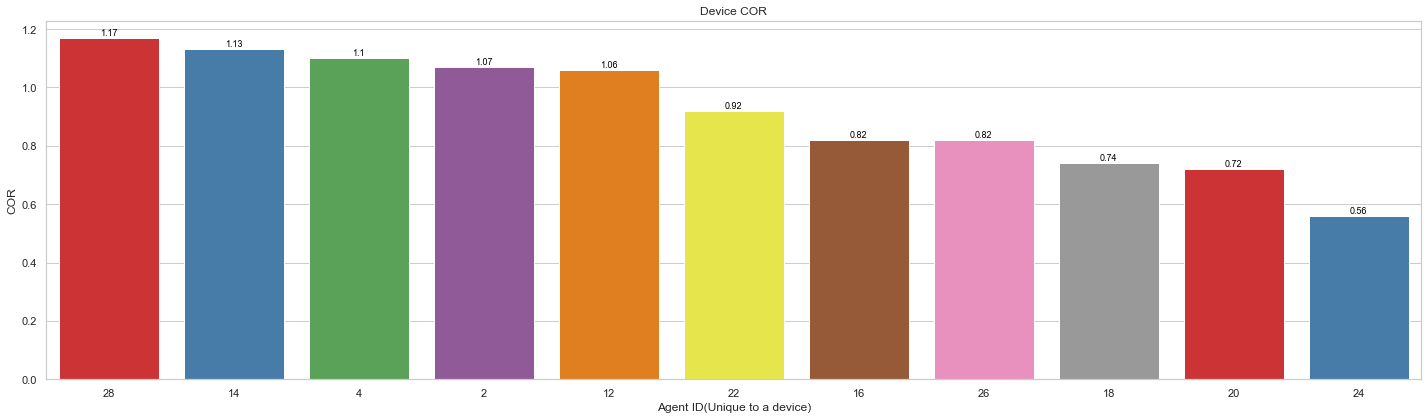

In [ ]:
# Set the style of the plot (optional but can improve aesthetics)
sns.set(style="whitegrid")
df_device_cor.sort_values('cor',inplace=True,ascending = False)
df_device_cor['cor'] = df_device_cor['cor'].round(2)

# Create a bar chart comparing May and June data for every country
plt.figure(figsize=(20, 6))
ax = sns.barplot(x='agent_id', y='cor', data=df_device_cor, palette='Set1')

# Set the title and labels
plt.title('Device COR')
ax.set_xlabel('Agent ID(Unique to a device)')
ax.set_ylabel('COR')

# Customize the legend and change the order of the legend labels
handles, labels = ax.get_legend_handles_labels()
# Change the order of the labels
# ax.legend(handles=handles, labels=labels, title='Month', loc='best')

# Annotate each bar with its corresponding y-value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

#### The device type with lowest COR is for the device with Agent id 24 and its COR is 0.56

### COR Analysis with Traffic Type

In [ ]:
df_traffic_type_cor = df_task1.groupby(['traffic_type']).agg({'session_id':'nunique','clickouts':'sum','is_repeater':'sum','session_duration':'mean','total_ctp':'sum','bookings':'sum'}).reset_index()

In [ ]:
df_traffic_type_cor.rename({'session_id':'sessions','is_repeater':'repeat_sessions','session_duration':'avg_session_duration'},axis=1, inplace =True)

In [ ]:
df_traffic_type_cor['cor'] = df_traffic_type_cor['clickouts']/df_traffic_type_cor['sessions']
## total sessions are 900000
df_traffic_type_cor['perc_sessions%'] = df_traffic_type_cor['sessions']*100/900000
df_traffic_type_cor['repeat_sessions%'] = df_traffic_type_cor['repeat_sessions']*100/df_traffic_type_cor['sessions']

In [ ]:
df_traffic_type_cor.sort_values('cor',ascending = False)

,traffic_type,sessions,clickouts,repeat_sessions,avg_session_duration,total_ctp,bookings,cor,perc_sessions%,repeat_sessions%
1,2,291930,360268,114870,613.660744,2836835,5738,1.234090,32.436667,39.348474
2,4,100000,83350,37031,349.575880,707791,554,0.833500,11.111111,37.031000
0,10,9568,7813,3313,427.558528,75678,5,0.816576,1.063111,34.625836
3,6,298502,205988,107784,322.464824,1549642,2328,0.690072,33.166889,36.108301
4,8,200000,102164,99741,193.373810,667983,264,0.510820,22.222222,49.870500


In [ ]:
df_entry_page = df_task1.groupby('entry_page').agg({'session_id':'nunique','clickouts':'sum','is_repeater':'sum','session_duration':'mean','total_ctp':'sum','bookings':'sum'}).reset_index()

In [ ]:
# Defining the number of quantiles
num_buckets = 3

# Define custom labels for the buckets
cor_labels = ["Low COR", "Medium COR", "High COR"]

# Use qcut to create the buckets with custom labels
df_entry_page['cor_buckets'] = pd.qcut(df_entry_page['cor'], q=num_buckets, labels=cor_labels)

# Now, df_entry_page contains a new column 'cor_buckets' that categorizes entry pages into "Low COR," "Medium COR," and "High COR" based on 'cor' values.

In [ ]:
df_entry_page_cor_buckets = df_entry_page[['entry_page','cor_buckets']]

In [ ]:
df_entry_page_cor_buckets = df_entry_page[['entry_page','cor_buckets']]

In [ ]:
df_entry_page_cor_buckets.head(5)

,entry_page,cor_buckets
0,2100,High COR
1,2106,Low COR
2,2108,Low COR
3,2111,High COR
4,2113,Medium COR


In [ ]:
df_task1 = pd.merge(df_task1,df_entry_page_cor_buckets, how='inner',on ='entry_page')

In [ ]:
df_traffic_type_entry_page_agg = df_task1.groupby(['traffic_type','cor_buckets']).agg({'session_id':'nunique','clickouts':'sum','is_repeater':'sum','session_duration':'mean','total_ctp':'sum','bookings':'sum'}).reset_index()

In [ ]:
df_traffic_type_total_sess = df_traffic_type_cor[['traffic_type','sessions']]

In [ ]:
df_traffic_type_total_sess.rename({'sessions':'total_traffic_type_sessions'},inplace = True,axis = 1)

/Users/ameen/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [ ]:
df_traffic_type_entry_page_agg = pd.merge(df_traffic_type_entry_page_agg,df_traffic_type_total_sess,on = 'traffic_type',how='inner')

In [ ]:
df_traffic_type_entry_page_agg.rename({'session_id':'sessions','is_repeater':'repeat_sessions','session_duration':'avg_session_duration'},axis=1, inplace =True)

In [ ]:
df_traffic_type_entry_page_agg

,traffic_type,cor_buckets,sessions,clickouts,repeat_sessions,avg_session_duration,total_ctp,bookings,total_traffic_type_sessions
0,10,Low COR,34,13,10,132.764706,5,0,9568
1,10,Medium COR,9376,7647,3256,425.743387,74080,5,9568
2,10,High COR,158,153,47,598.708861,1593,0,9568
3,2,Low COR,18448,2879,3332,131.649013,28845,37,291930
4,2,Medium COR,39828,31937,19406,434.807372,261173,440,291930
5,2,High COR,233654,325452,92132,682.204508,2546817,5261,291930
6,4,Low COR,16,24,4,1243.062500,113,0,100000
7,4,Medium COR,81516,66371,30003,342.737450,575879,457,100000
8,4,High COR,18468,16955,7024,378.985976,131799,97,100000
9,6,Low COR,322,80,105,205.683230,938,1,298502


In [ ]:
df_traffic_type_entry_page_agg['traffic_type_session_perc'] = df_traffic_type_entry_page_agg['sessions']*100/df_traffic_type_entry_page_agg['total_traffic_type_sessions']

In [ ]:
df_traffic_type_entry_page_agg.head()

,traffic_type,cor_buckets,sessions,clickouts,repeat_sessions,avg_session_duration,total_ctp,bookings,total_traffic_type_sessions,traffic_type_session_perc
0,10,Low COR,34,13,10,132.764706,5,0,9568,0.355351
1,10,Medium COR,9376,7647,3256,425.743387,74080,5,9568,97.993311
2,10,High COR,158,153,47,598.708861,1593,0,9568,1.651338
3,2,Low COR,18448,2879,3332,131.649013,28845,37,291930,6.319323
4,2,Medium COR,39828,31937,19406,434.807372,261173,440,291930,13.642997


/var/folders/zb/63y1717919g6xzzntmcglcvw0000gn/T/ipykernel_11913/3160579850.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='traffic_type', y='cor', data=df_traffic_type_cor, palette='Set1', ax=axes[1])
/var/folders/zb/63y1717919g6xzzntmcglcvw0000gn/T/ipykernel_11913/3160579850.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='traffic_type', y='avg_session_duration', data=df_traffic_type_cor, palette='Set1', ax=axes[2])


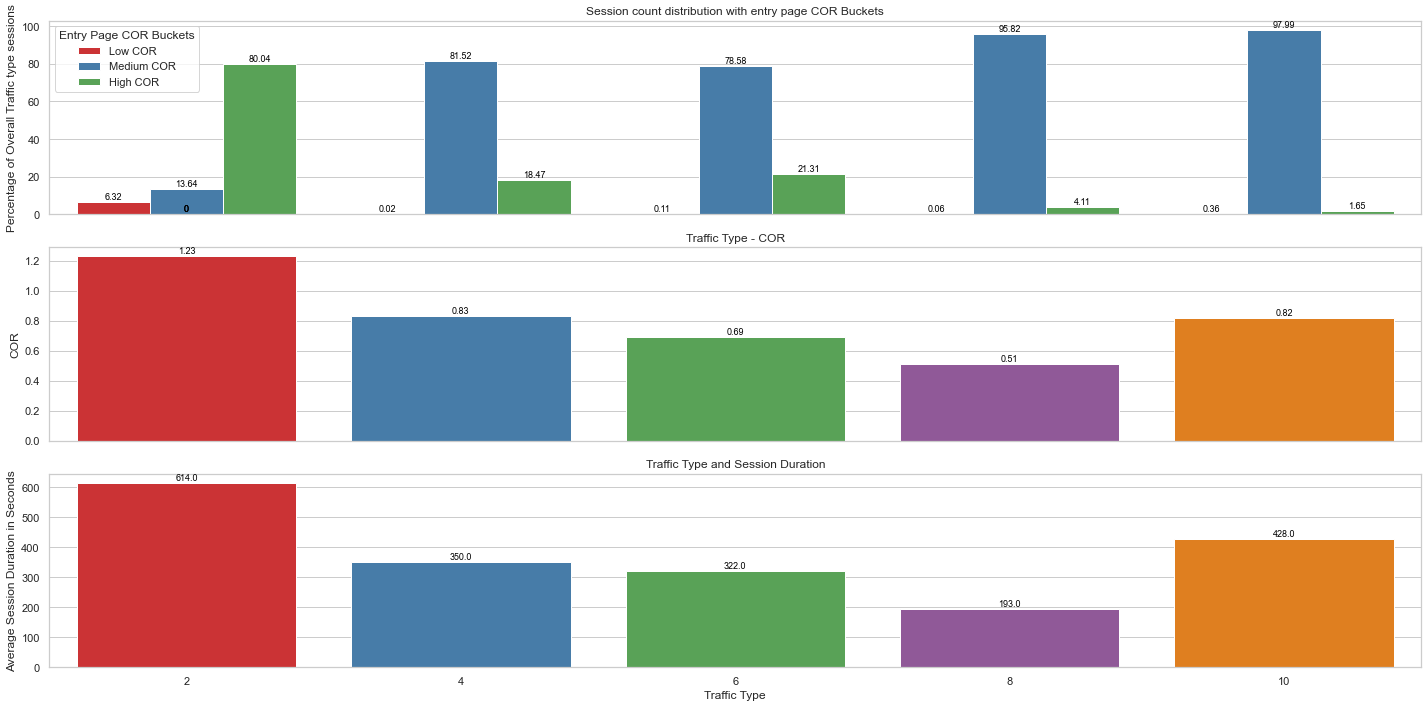

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame df_traffic_type_entry_page_agg

sns.set(style="whitegrid")
df_traffic_type_entry_page_agg['traffic_type'] = df_traffic_type_entry_page_agg['traffic_type'].astype(int)
df_traffic_type_entry_page_agg.sort_values(['traffic_type','cor_buckets'], inplace=True)
df_traffic_type_entry_page_agg['traffic_type_session_perc'] = df_traffic_type_entry_page_agg['traffic_type_session_perc'].round(2)

# Create a figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(20, 10), sharex=True)

# Plot 1 - Bar Chart for 'traffic_type_session_perc'
sns.barplot(x='traffic_type', y='traffic_type_session_perc', hue='cor_buckets', data=df_traffic_type_entry_page_agg, palette='Set1', ax=axes[0])
axes[0].set_title('Session count distribution with entry page COR Buckets')
axes[0].set_xlabel('Traffic Type')
axes[0].set_ylabel('Percentage of Overall Traffic type sessions')
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles=handles, labels=labels, title='Entry Page COR Buckets', loc='best')

# Annotate each bar with its corresponding y-value
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')

# Plot 2 - Bar Chart for 'cor'
df_traffic_type_cor.sort_values('cor', inplace=True, ascending=False)
df_traffic_type_cor['cor'] = df_traffic_type_cor['cor'].round(2)
sns.barplot(x='traffic_type', y='cor', data=df_traffic_type_cor, palette='Set1', ax=axes[1])
axes[1].set_title('Traffic Type - COR')
axes[1].set_ylabel('COR')
axes[1].set_xlabel('Traffic Type')

for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')

# Plot 3 - Bar Chart for 'avg_session_duration'
df_traffic_type_cor['avg_session_duration'] = df_traffic_type_cor['avg_session_duration'].round(0)
sns.barplot(x='traffic_type', y='avg_session_duration', data=df_traffic_type_cor, palette='Set1', ax=axes[2])
axes[2].set_title('Traffic Type and Session Duration')
axes[2].set_xlabel('Traffic Type')
axes[2].set_ylabel('Average Session Duration in Seconds')

for p in axes[2].patches:
    axes[2].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


#### With Respect to Traffic Type COR is varying from 0.51 to 1.23
##### Summary of the Traffic Type - COR Analysis
* Traffic type with the highest COR is **2** with a COR of **1.23**, and **32%** of the total sessions are coming from traffic type 2, most likely indicating it is an organic channel, and high-intent users are coming through this channel.
* Traffic type with the lowest COR is **8** with a COR of **0.51**, and **22%** of the total sessions are coming from traffic type 8.
* Checked the average session duration in each traffic type and found out a correlation that higher the average session time, the higher the COR. Average session time is highest for Traffic type 2 (**614 Seconds**) and lowest for traffic type 8 (**193 Seconds**), and they have the highest and lowest CORs, respectively.
* Checked the entry page-wise COR and created 3 equal buckets for entry pages based on the COR value, namely High COR, Medium COR, and Low COR buckets. It was figured out that out of the total sessions coming from traffic type 2, most of the sessions are starting from entry pages with High COR value (80% of the total sessions from traffic 2 are starting from entry pages in high COR buckets).

## Task1 Q2

Can you think of an additional two KPIs? Please provide KPI definitions and charts or
tables showing the development over time along with descriptions and critical
analysis of what you see.

### 1. CTP Per Session Ratio
CTP Per Session= Total CTP / Total Sessions

In [ ]:
df_agg1['ctp_ratio'] = df_agg1['total_ctp']/df_agg1['total_sessions']
df_agg1['cor'] = df_agg1['clickouts']/df_agg1['total_sessions']

In [ ]:
df_agg1

,date,Weekday Name,total_sessions,users,repeat_user_sessions,clickouts,bookings,average_session_duration,total_ctp,ctp_ratio,cor
0,2022-05-01,Sunday,18332,18307,7167,14651,181,371.563877,110003,6.000600,0.799204
1,2022-05-02,Monday,17572,17551,7091,13678,169,362.815388,103655,5.898873,0.778397
2,2022-05-03,Tuesday,16546,16538,6761,13425,158,383.436782,107434,6.493050,0.811374
3,2022-05-04,Wednesday,15448,15426,6215,12227,152,367.729997,86889,5.624612,0.791494
4,2022-05-05,Thursday,14659,14645,5787,11060,127,351.640357,78661,5.366055,0.754485
...,...,...,...,...,...,...,...,...,...,...,...
56,2022-06-26,Sunday,15937,15923,6236,13883,134,399.573822,103894,6.519044,0.871118
57,2022-06-27,Monday,15123,15109,5970,13193,161,406.881505,108463,7.172056,0.872380
58,2022-06-28,Tuesday,15148,15134,6081,13376,141,404.596184,108755,7.179496,0.883021
59,2022-06-29,Wednesday,14373,14352,5746,12399,132,409.474153,97429,6.778613,0.862659


/var/folders/zb/63y1717919g6xzzntmcglcvw0000gn/T/ipykernel_11913/368752611.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
/var/folders/zb/63y1717919g6xzzntmcglcvw0000gn/T/ipykernel_11913/368752611.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


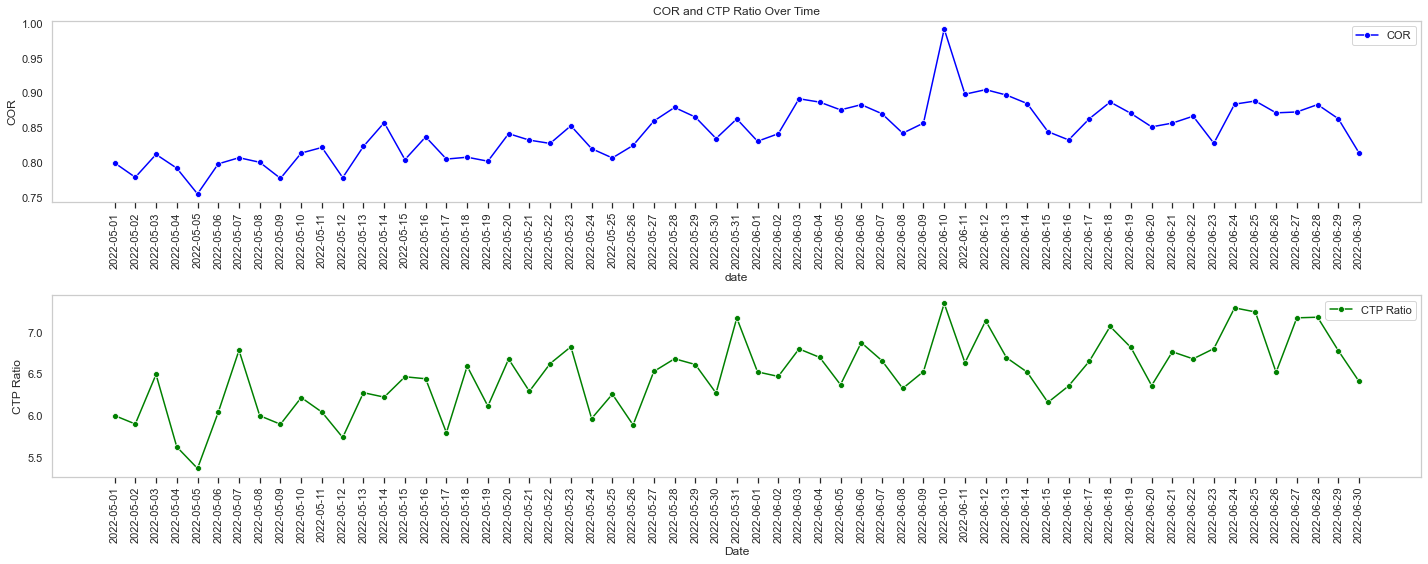

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8))

# Create the line plot for 'cor'
sns.lineplot(data=df_agg1, x='date', y='cor', marker='o', color='blue', label='COR', ax=ax1)
ax1.set_ylabel('COR')
ax1.set_title('COR and CTP Ratio Over Time')

# Rotate the x-axis tick labels by 90 degrees
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.tick_params(axis='x', bottom=True, labelbottom=True)  # Add x-axis ticks

# Remove grid lines
ax1.grid(False)

# Create the line plot for 'ctp_ratio'
sns.lineplot(data=df_agg1, x='date', y='ctp_ratio', marker='o', color='green', label='CTP Ratio', ax=ax2)
ax2.set_xlabel('Date')
ax2.set_ylabel('CTP Ratio')

# Rotate the x-axis tick labels by 90 degrees
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.tick_params(axis='x', bottom=True, labelbottom=True)  # Add x-axis ticks

# Remove grid lines
ax2.grid(False)

# Set the same x-axis limits for both subplots
ax2.set_xlim(ax1.get_xlim())

# Add legends to the subplots
ax1.legend(loc='best')
ax2.legend(loc='best')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
correlation = df_agg1['cor'].corr(df_agg1['ctp_ratio'])
print(correlation*100)

79.39828162450728


1. Monitoring CTP per session provides a valuable method for evaluating the performance of trivago's core metric, COR (Clickout Ratio). This metric quantifies the quantity of content items viewed by a user during a single session, offering valuable insights into the depth of content available on the listing page. A higher number of content items not only extends a user's visit on the Trivago site but also increases the likelihood of clickout interactions.

2. When COR experiences a decline, examining CTP per session can yield additional insights. A simultaneous decrease in CTP per session suggests that users may not be encountering a sufficient number of items to interact with and complete transactions.

3. On the other hand, if COR experiences a decline while CTP per session remains relatively stable, it prompts a more detailed investigation into the quality and relevance of the displayed content concerning the users' preferences.

4. The analysis of the plotted data reveals a striking similarity in the trends of COR and CTP per session over time.

5. Furthermore, a correlation analysis between CTP per session and COR demonstrates a robust correlation of 80%.

### 2. Average Session Duration

/var/folders/zb/63y1717919g6xzzntmcglcvw0000gn/T/ipykernel_11913/2300082090.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
/var/folders/zb/63y1717919g6xzzntmcglcvw0000gn/T/ipykernel_11913/2300082090.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


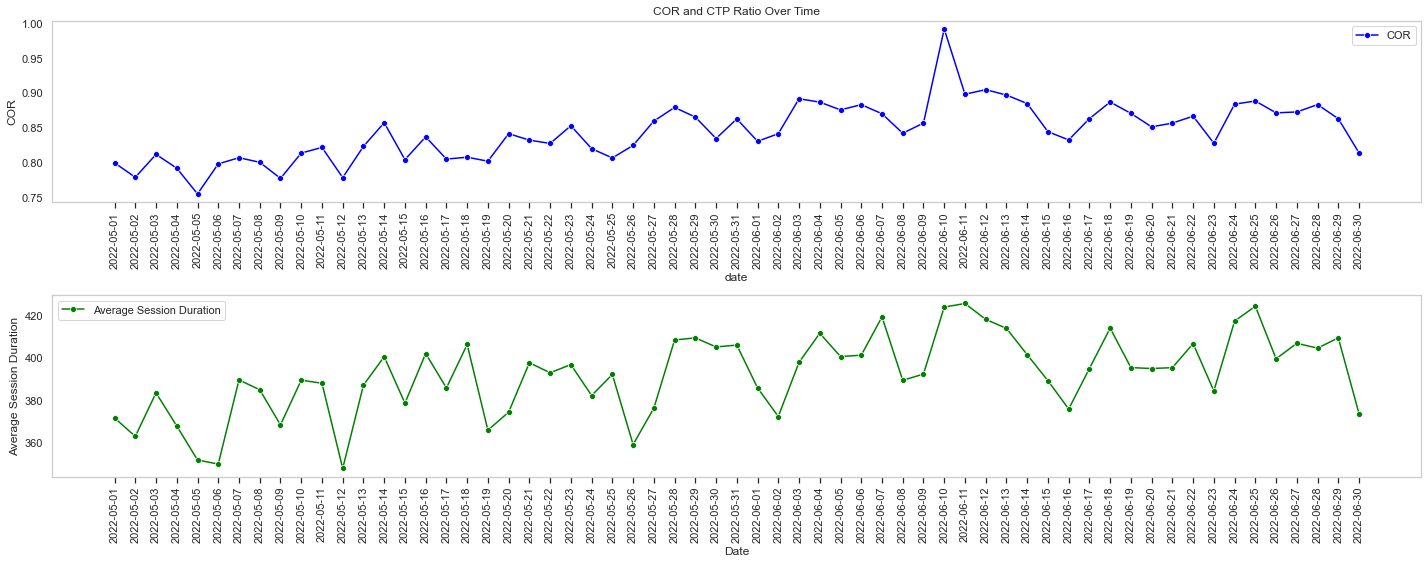

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8))

# Create the line plot for 'cor'
sns.lineplot(data=df_agg1, x='date', y='cor', marker='o', color='blue', label='COR', ax=ax1)
ax1.set_ylabel('COR')
ax1.set_title('COR and CTP Ratio Over Time')

# Rotate the x-axis tick labels by 90 degrees
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.tick_params(axis='x', bottom=True, labelbottom=True)  # Add x-axis ticks

# Remove grid lines
ax1.grid(False)

# Create the line plot for 'average session duration'
sns.lineplot(data=df_agg1, x='date', y='average_session_duration', marker='o', color='green', label='Average Session Duration', ax=ax2)
ax2.set_xlabel('Date')
ax2.set_ylabel('Average Session Duration')

# Rotate the x-axis tick labels by 90 degrees
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.tick_params(axis='x', bottom=True, labelbottom=True)  # Add x-axis ticks

# Remove grid lines
ax2.grid(False)

# Set the same x-axis limits for both subplots
ax2.set_xlim(ax1.get_xlim())

# Add legends to the subplots
ax1.legend(loc='best')
ax2.legend(loc='best')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
correlation = df_agg1['cor'].corr(df_agg1['average_session_duration'])
print(correlation*100)

80.83766043574849


1. Monitoring Average Session Duration provides crucial insights into user intent and their likelihood to make a booking. Longer user sessions indicate more extensive exploration of options, resulting in a higher COR ratio and increased revenue for Trivago.

2. A decrease in average session time serves as an indicator of potential issues, such as difficulties in finding the best options, which could be attributed to various factors, including ranking algorithms or recommendation engines.

3. The plotted data unmistakably reveals a direct correlation between Average Session Duration and COR. Our calculated correlation percentage of 80% solidifies this strong relationship between COR and Average Session Duration.